# Total Number of Bands and Albums Formed Across all Years

In [11]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None #'warn'
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
album_details = pd.read_csv("World_Music_Album_Details.csv", sep = ",", na_values=["N/A"], encoding = 'latin-1')
band_details = pd.read_csv("World_Music_Bands_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )
review_details = pd.read_csv("World_Music_Reviews_Details.csv",sep = ",", na_values=["N/A"], encoding = 'latin-1' )

In [6]:
music_bands_count = band_details.groupby("Band_Formation")["ID"].count().cumsum()
music_albums_count = album_details.groupby("Release_Year")["ID"].count().cumsum()

In [24]:
df = pd.DataFrame({"bands": music_bands_count,"albums": music_albums_count})
df_sort = df.sort(ascending = False)
df_sort.to_csv('bands_albums_creation.csv')
df_sort.head(15)

,albums,bands
2017.0,12618.0,NaN
2016.0,12614.0,11261.0
2015.0,11818.0,11234.0
2014.0,10851.0,11118.0
2013.0,9882.0,10909.0
2012.0,8972.0,10601.0
2011.0,8086.0,10214.0
2010.0,7277.0,9774.0
2009.0,6535.0,9275.0
2008.0,5862.0,8716.0


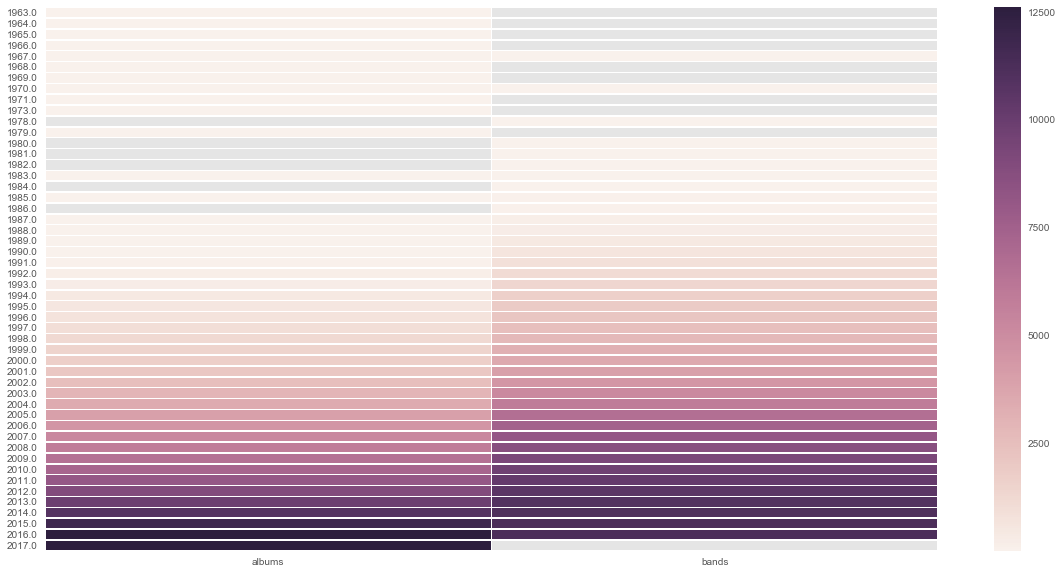

In [25]:
sns.heatmap(df, linewidth = 0.5)
fig = plt.gcf()
fig.set_size_inches(20, 10)

# Most Number of words used in Reviews given by Listeners

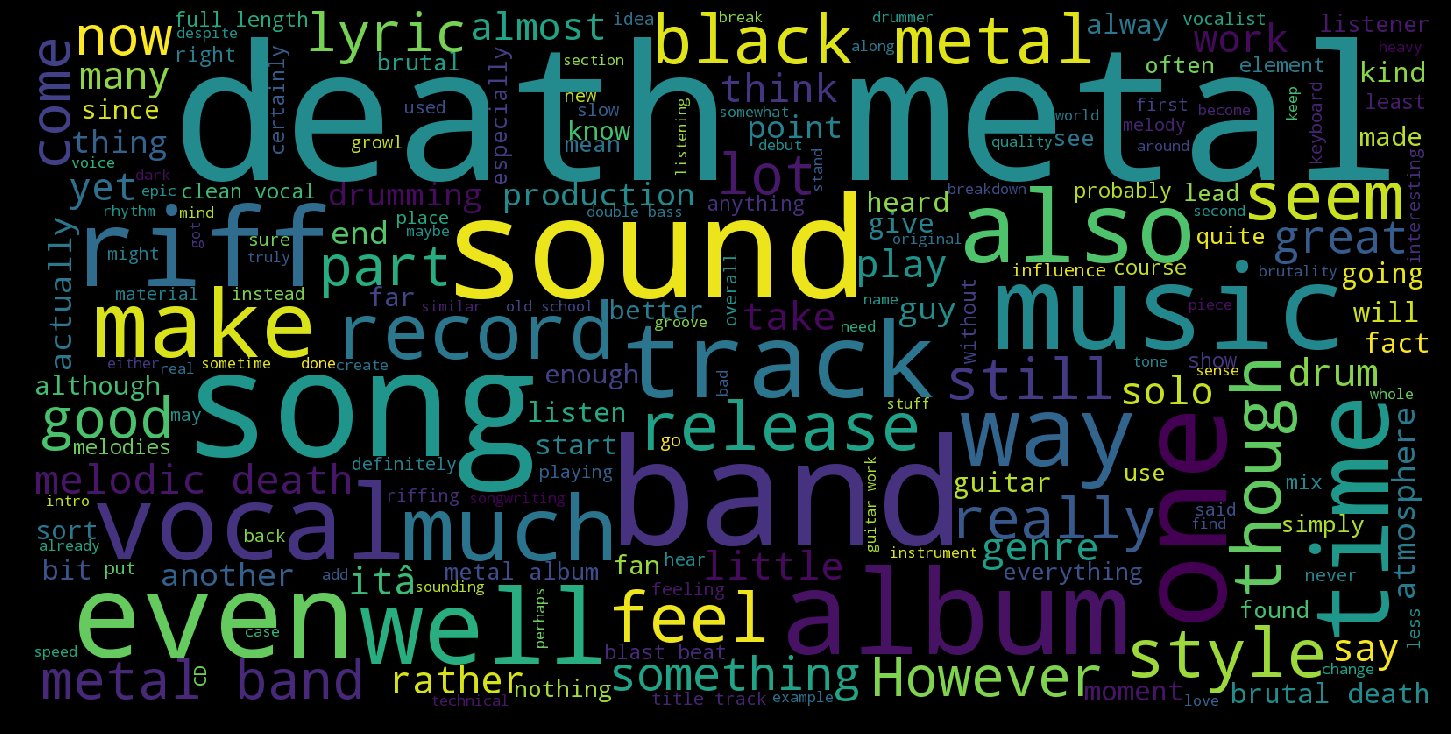

In [19]:
Review_Cloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=1600, height=800
).generate(" ".join(review_details.Reviews.dropna().str.replace("|", ",").values))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(Review_Cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()